In [34]:
import os
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn
#nltk.download('all')

In [2]:
!pwd

/Users/mac/Downloads/ML_practise/NLP exercise/Sentiment_analysis


In [3]:
os.environ['kaggle_data'] = '/Users/mac/Downloads/ML_practise/NLP exercise/Sentiment_analysis'

In [4]:
!pip install kaggle

In [16]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

100%|██████████████████████████████████████| 1.90M/1.90M [00:01<00:00, 1.45MB/s]
100%|██████████████████████████████████████| 1.90M/1.90M [00:01<00:00, 1.36MB/s]


In [17]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data


Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [5]:
train_data = 'data/train.tsv.zip'
test_data = 'data/test.tsv.zip'
label = 'data/sampleSubmission.csv'

In [6]:
df_train = pd.read_csv(train_data, sep ='\t')
df_train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
df_test = pd.read_csv(test_data, sep='\t')
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

In [8]:
def preprocess(doc):
    #token
    #remove stopwords
    #lemmization
    #return join
    token = word_tokenize(doc.lower())
    tokenz=[]
    for tok in token:
        if tok not in stopwords.words('english'):
            tokenz.append(tok)
    vector = WordNetLemmatizer()
    data = [vector.lemmatize(tok) for tok in tokenz]
    return " ".join(data)

In [9]:
df_train['Phrase']= df_train.Phrase.apply(preprocess)

In [10]:
df_test['Phrase']= df_test.Phrase.apply(preprocess)

In [37]:
df_train['Phrase']

0         series escapade demonstrating adage good goose...
1            series escapade demonstrating adage good goose
2                                                    series
3                                                          
4                                                    series
                                ...                        
156055                                            hearst 's
156056                             forced avuncular chortle
156057                                    avuncular chortle
156058                                            avuncular
156059                                              chortle
Name: Phrase, Length: 156060, dtype: object

In [19]:
def sentiment(data):
    sent = SentimentIntensityAnalyzer()
    s = sent.polarity_scores(data)
    score = s['compound']
    if score <=-0.5:
        senti = 'negative'
    elif -0.5 < score <= -0.1:
        senti = 'somewhat negative'
    elif -0.1 < score <= 0.1:
        senti= "neutral"
    elif 0.1 < score <= 0.5:
        senti = 'somewhat positive'
    else:
        senti = 'positive'
    #senti = 2 if score['pos'] > 0 else -1
    return senti

In [21]:
df_train['Predicted'] = df_train["Phrase"].apply(sentiment)

In [26]:
def convert(data):
    if data == 'negative':
        data = 0
    elif data == 'somewhat negative':
        data = 1
    elif data == 'neutral':
        data = 2
    elif data == 'somewhat positive':
        data = 3
    elif data == 'positive':
        data = 4
    return data

In [27]:
df_train['Predicted'] = df_train['Predicted'].map(convert)

In [28]:
cm = confusion_matrix(df_train['Sentiment'], df_train['Predicted'])

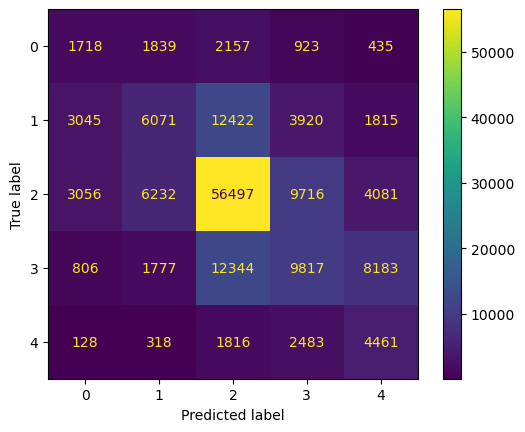

In [33]:
dis = ConfusionMatrixDisplay(cm, display_labels=[0,1,2,3,4])
dis.plot()

In [36]:
dat = classification_report(df_train['Sentiment'], df_train['Predicted'])
print(dat)

              precision    recall  f1-score   support

           0       0.20      0.24      0.22      7072
           1       0.37      0.22      0.28     27273
           2       0.66      0.71      0.69     79582
           3       0.37      0.30      0.33     32927
           4       0.24      0.48      0.32      9206

    accuracy                           0.50    156060
   macro avg       0.37      0.39      0.37    156060
weighted avg       0.50      0.50      0.50    156060

